In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.spatial.transform import Rotation as Rot
import json
from mimicplay.scripts.aloha_process.simarUtils import *
import torchvision

In [2]:
# data = h5py.File("/coc/flash7/datasets/egoplay/oboov2_robot_apr16/oboov2_robot_apr16Mimicplay.hdf5", "r")
# data = h5py.File("/coc/flash7/datasets/egoplay/bowl_place_hand_mar1/robomimic/converted_episodes/plushiesMimicplay.hdf5", "r")
data = h5py.File("/coc/flash7/datasets/egoplay/oboo_aria_apr16/oboo_aria_apr16_rightMimicplay_with_type_label_copy.hdf5", "r")

In [3]:
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_10', 'demo_100', 'demo_101', 'demo_102', 'demo_103', 'demo_104', 'demo_105', 'demo_106', 'demo_107', 'demo_108', 'demo_109', 'demo_11', 'demo_110', 'demo_111', 'demo_112', 'demo_113', 'demo_114', 'demo_115', 'demo_116', 'demo_117', 'demo_118', 'demo_119', 'demo_12', 'demo_120', 'demo_121', 'demo_122', 'demo_123', 'demo_124', 'demo_125', 'demo_126', 'demo_127', 'demo_128', 'demo_129', 'demo_13', 'demo_130', 'demo_131', 'demo_132', 'demo_133', 'demo_134', 'demo_135', 'demo_136', 'demo_137', 'demo_138', 'demo_139', 'demo_14', 'demo_140', 'demo_141', 'demo_142', 'demo_143', 'demo_144', 'demo_145', 'demo_146', 'demo_147', 'demo_148', 'demo_149', 'demo_15', 'demo_150', 'demo_151', 'demo_152', 'demo_153', 'demo_154', 'demo_155', 'demo_156', 'demo_157', 'demo_158', 'demo_159', 'demo_16', 'demo_160', 'demo_161', 'demo_162', 'demo_163', 'demo_164', 'demo_165', 'demo_166', 'demo_167', 

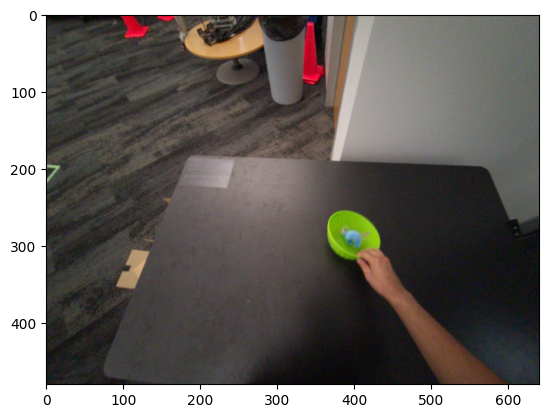

In [4]:
plt.imshow(data["data/demo_1/obs/front_img_1"][0])

In [5]:
import os
import random
output_path = "/nethome/skareer6/flash9/Projects/EgoPlay/diffusers/data/hand_images"
# Get the list of demo names from the HDF5 data object
demo_names = list(data.keys())

# Create the output folder if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Randomly sample one image per demo and save it in the output folder
for i in range(200):
    demo_group = data[f"data/demo_{i+1}"]
    rand_frame = random.randint(0, len(demo_group["obs/front_img_1"]) - 1)
    img = demo_group["obs/front_img_1"][rand_frame]
    # img = img[:, :, [2, 1, 0]]

    plt.imsave(f"{output_path}/demo_{i}.png", img.astype(np.uint8))


## Raw Aloha

In [2]:
data = h5py.File("/coc/flash7/datasets/egoplay/diffusion/episode_0.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['action', 'observations']>
action: (5000, 14)
observations: dict with keys:  <KeysViewHDF5 ['effort', 'images', 'qpos', 'qvel']>
	effort: (5000, 14)
	images: dict with keys:  <KeysViewHDF5 ['cam_high', 'cam_right_wrist', 'cam_right_wrist_raw_depth']>
		cam_high: (5000, 480, 640, 3)
		cam_right_wrist: (5000, 480, 640, 3)
		cam_right_wrist_raw_depth: (5000, 480, 640)
	qpos: (5000, 14)
	qvel: (5000, 14)


In [4]:
import os
import random
output_path = "/nethome/skareer6/flash9/Projects/EgoPlay/diffusers/data/robo_images_crop"
# Get the list of demo names from the HDF5 data object
# demo_names = list(data.keys())

# Create the output folder if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Randomly sample one image per demo and save it in the output folder
for i in range(0, 5000, 50):
    img = data["observations/images/cam_high"][i]

    plt.imsave(os.path.join(output_path, f"demo_{i}.png"), img.astype(np.uint8))